<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(1)_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 라이브러리 및 데이터 불러오기
___

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' #matplotlib  한글 깨짐 방지

#그래픽 출력 결과를 셀 아래 표시
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

2. Import the dataset and assign it to a variable calld 'movies'

In [4]:
from google.colab import drive
drive.mount('/content/drive') #드라이브에 접근해서 파일 가져오기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
movies = pd.read_csv('/content/movies_train.csv')

In [58]:
#결측치 메우기
movies['dir_prev_bfnum'].fillna(0, inplace=True)

# 데이터 시각화 및 분석

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 관객수 분석
# 1-1) 관객수 - 배급사

- 사용한 변수:  distributor, box_off_num 
- 가설:  대형 배급사에서 제작한 영화일수록 그 작품들의 관객수가 많을 것이다. 
- 배급사 규모에 따라 관객수가 어떻게 다른지 파악하기 위해 다음 과정 수행.

Text(0, 0.5, 'box_off_num')

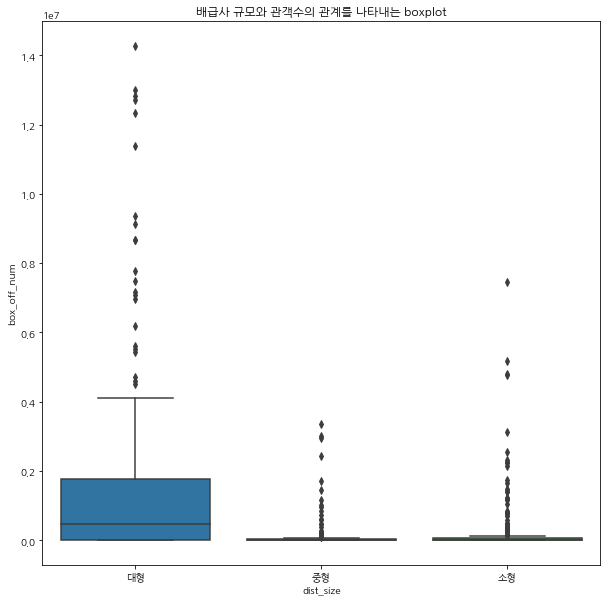

In [29]:
# 배급사별 상영 영화 수를 dist_aud_movie라는 열 이름으로 movies dataframe에 추가
movies['dist_aud_movie'] = movies.groupby(['distributor'])['distributor'].transform('count')
movies.head()

# 상영 영화 수에 따라 배급사의 규모를 구별 
# dist_aud_movie가 26 이상이면 대형 배급사, 6 이상 26 미만이면 중형 배급사, 6 미만이면 소형 배급사로 구분하여 dist_size라는 열 이름으로 movies dataframe에 추가
condlist = [( movies['dist_aud_movie'] >= 26),( movies['dist_aud_movie'] < 26) & ( movies['dist_aud_movie'] >= 6),( movies['dist_aud_movie'] < 6)]
choicelist = ['대형','중형','소형']
movies['dist_size'] = np.select(condlist, choicelist)
movies.head()

# 배급사 규모(대형, 중형, 소형)와 관객수의 관계
plt.rcParams['figure.figsize'] = [10, 10]
ax=plt.subplots()
ax=sns.boxplot(x='dist_size',y='box_off_num',data= movies,order=['대형','중형','소형'])
ax.set_title('배급사 규모와 관객수의 관계를 나타내는 boxplot')
ax.set_xlabel('dist_size')
ax.set_ylabel('box_off_num')

결론 : 대형 배급사에서 제작하는 영화의 경우 중형, 소형 배급사보다 관객수가 월등히 많다. 이는 아마 대형 배급사일수록 광고효과가 좋아서 일 것이다. 반면 중형 배급사와 소형 배급사의 경우 관객 수가 유의미한 차이를 보이지는 않았다.

# 1-2) 관객수 - 장르

- 사용한 변수:  genre, box_off_num 

In [12]:
#장르 개수 확인
movies['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [13]:
# 장르별 평균 관객 수 구하기
genre_aud = movies.groupby('genre')['box_off_num'].mean()
print(genre_aud)

genre
SF        1.788346e+06
공포        5.908325e+05
느와르       2.263695e+06
다큐멘터리     6.717226e+04
드라마       6.256898e+05
멜로/로맨스    4.259680e+05
뮤지컬       6.627000e+03
미스터리      5.275482e+05
서스펜스      8.261100e+04
애니메이션     1.819267e+05
액션        2.203974e+06
코미디       1.193914e+06
Name: box_off_num, dtype: float64


Text(0, 0.5, '관객 수')

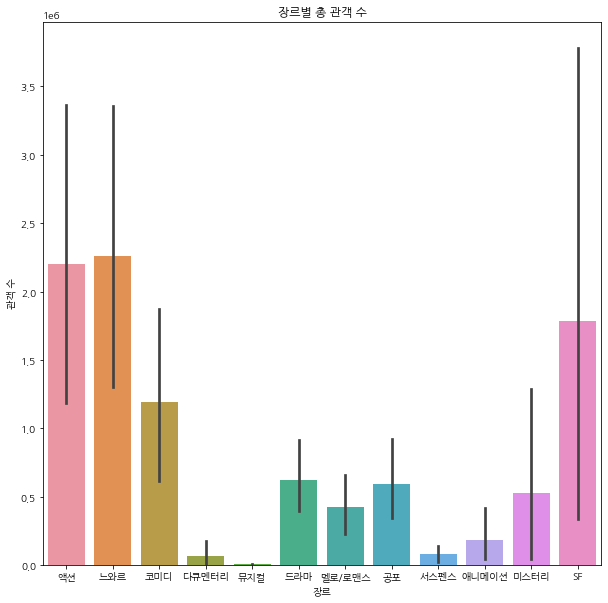

In [14]:
#장르별 총 관객 수 Boxplot 그리기
plt.rcParams['figure.figsize'] = [10,10]
ax = plt.subplots()
ax = sns.barplot(x='genre', y='box_off_num',data = movies)
ax.set_title('장르별 총 관객 수')
ax.set_xlabel('장르')
ax.set_ylabel('관객 수')

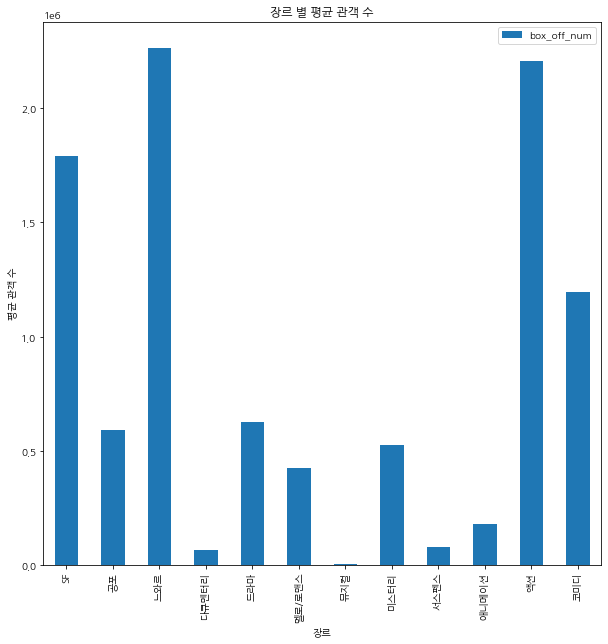

In [15]:
#장르별 평균 관객 수 Histogram 그리기
plt.figure()
genre_aud.plot(kind = 'bar')
# 제목 및 라벨 추가
plt.title('장르 별 평균 관객 수')
plt.xlabel('장르')
plt.ylabel('평균 관객 수')
plt.legend()

plt.show()

##### | 분석 결과
___
- 느와르, 액션, SF, 그리고 코미디 순으로 총 관객 수가 많다.
- 느와르, 액션, SF, 그리고 코미디 순으로 평균 관객 수가 많다.

# 1-3) 관객수 - 감독유명도 


In [9]:
movies['유명도']=''
for i in range(len(movies)):
  if movies['dir_prev_bfnum'][i]==0: 
    movies['유명도'][i]='1'
  elif movies['dir_prev_bfnum'][i]<100000:
    movies['유명도'][i]='2'
  elif movies['dir_prev_bfnum'][i]<500000:
    movies['유명도'][i]='3'
  elif movies['dir_prev_bfnum'][i]<1000000: 
    movies['유명도'][i]='4'
  else:
    movies['유명도'][i]='5'

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,유명도
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,5
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,5
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,3


<Figure size 432x288 with 0 Axes>

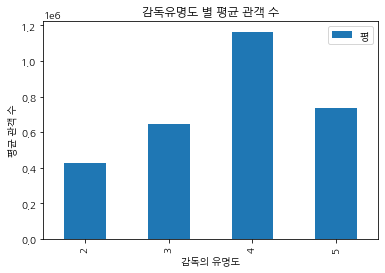

In [20]:
plt.figure()
movies[['box_off_num']].groupby(movies['유명도']).mean().plot(kind='bar')

plt.title('감독유명도 별 평균 관객 수')
plt.xlabel('감독의 유명도')
plt.ylabel('평균 관객 수')
plt.legend('평균 관객 수')

plt.show()

##### | 분석 결과
___
- 감독의 전작 관객 수가 많은 4와 5의 범주에서 평균 관객 수가 많은 것은 사실이다.
- 하지만, 전작 관객 수가 제일 많다고 해서 평균 관객 수가 제일 많은 것은 아니다. 
- 두 변수 사이의 뚜렷한 인과관계가 있다고 할 수 없다. 